Single band model from PRB 94, 094515 (2016)  http://journals.aps.org/prb/pdf/10.1103/PhysRevB.94.094515

In [171]:
import numpy as np

from numpy import cos, sin

%matplotlib inline
import matplotlib.pyplot as plt

from collections import namedtuple

In [172]:
s0 = np.eye(2)
sz = np.array([[1, 0], [0, -1]])

In [186]:
# Parameters
params = namedtuple('params', ['t', 'mu', 'alpha'])

p = params(t = 1, mu = 0*0.25*0.5, alpha = 0*8e-3)

In [187]:
def xi(kx, ky, p):
    return p.t*np.abs(2*cos(kx*np.sqrt(3.)/2)*np.exp(1j*ky/2.) + np.exp(-3j*ky/2.)) - p.mu

def F(kx, ky, p):
    return p.alpha*(sin(kx) - 2*cos(np.sqrt(3.)*ky/2))*sin(kx/2.)

def Ham(kx, ky, p):
    return xi(kx, ky, p)*s0 + F(kx, ky, p)*sz

def energies(kx, ky, p):
    return np.linalg.eigh(Ham(kx, ky, p))[0]

In [188]:
energies(0, 0, p)

array([ 3.,  3.])

In [199]:
Kp = np.array([4*np.pi/(3*np.sqrt(3)), 0])

In [200]:
energies(Kp[0], Kp[1], p)

array([  4.44089210e-16,   4.44089210e-16])

In [191]:
kxs = np.linspace(-np.pi, np.pi, 201)

In [192]:
disp =[energies(kx, 0, p) for kx in kxs] 

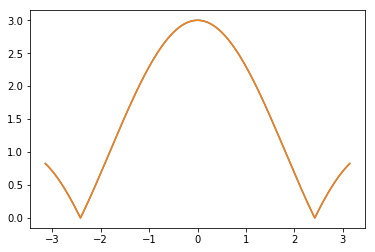

In [193]:
plt.plot(kxs, disp)

In [194]:
kxs = np.linspace(2, 3, 801)
disp =[energies(kx, 0, p) for kx in kxs] 

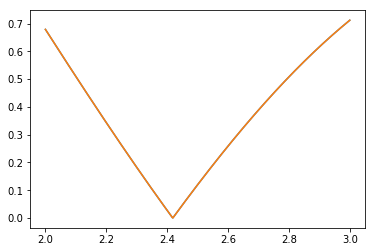

In [195]:
plt.plot(kxs, disp)

Dirac cones at the K points

In [201]:
def evaluate_on_grid(X, Y, func):
    """ X, Y should be in np.meshgrid form. It's enough for func to work on floats. """
    data = []
    for xx, yy in zip(X, Y):
        data.append([func(i,j) for i, j in zip(xx, yy)])
    data = np.array(data)
    return data

def band(p, ind=0):
    def func(kx, ky):
        return energies(kx, ky, p)[0]
    return func

In [202]:
kmax = 3.0
# Generate a square mesh
N = 200
kxs = np.linspace(-kmax, kmax, N)
kys = np.linspace(-kmax, kmax, N)
kxs, kys = np.meshgrid(kxs, kys)
kx_flipped = evaluate_on_grid(kxs, kys, func=band(p, ind=0))

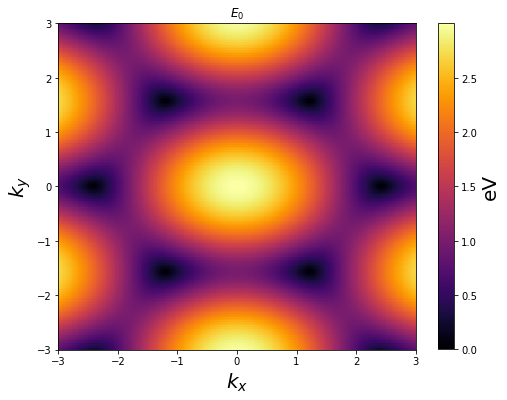

In [208]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.pcolor(kxs, kys, np.round(kx_flipped, 8), cmap='inferno', vmin=0) #, aspect='auto')
plt.colorbar().set_label(label=r'eV',size=20)
ax.set_title(r'$E_0$')
ax.set_xlabel('$k_x$', fontsize=20)
ax.set_ylabel('$k_y$', fontsize=20)